In [2]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

os.chdir("C:\\Users\\Madhav\\Desktop\\PAZ Code\\Dataset")
#os.getcwd()

movies=pd.read_csv('Section6-Homework-Data.csv',encoding='latin1')   #encoding used?
movies.columns
movies.rename(columns={'Day of Week':'Day','Movie Title':'MovieTitle', 'Release Date':'ReleaseDate', 
                       'Adjusted Gross ($mill)':'AdjustedGrossMill', 'Budget ($mill)':'BudgetMill', 'Gross ($mill)':'GrossMill',
       'IMDb Rating':'IMDbRating', 'MovieLens Rating':'MLRating', 'Overseas ($mill)':'OverseasMill', 'Overseas%':'OverseasPC',
       'Profit ($mill)':'ProfitMill', 'Profit%':'ProfitPC', 'Runtime (min)':'RuntimeMin', 'US ($mill)':'USMill',
       'Gross % US':'GrossPCUS'},inplace=True)
movies.head()

movies.Day=movies.Day.astype('category')
movies.Director=movies.Director.astype('category')
movies.Genre=movies.Genre.astype('category')
movies.MovieTitle=movies.MovieTitle.astype('category')
movies.ReleaseDate=movies.ReleaseDate.astype('category')
movies.Studio=movies.Studio.astype('category')
movies.GrossMill=movies.GrossMill.astype('category')
movies.OverseasMill=movies.OverseasMill.astype('category')
movies.ProfitMill=movies.ProfitMill.astype('category')
movies.AdjustedGrossMill=movies.AdjustedGrossMill.astype('category')
movies.info()
movies.Studio.cat.categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day                  608 non-null category
Director             608 non-null category
Genre                608 non-null category
MovieTitle           608 non-null category
ReleaseDate          608 non-null category
Studio               608 non-null category
AdjustedGrossMill    608 non-null category
BudgetMill           608 non-null float64
GrossMill            608 non-null category
IMDbRating           608 non-null float64
MLRating             608 non-null float64
OverseasMill         608 non-null category
OverseasPC           608 non-null float64
ProfitMill           608 non-null category
ProfitPC             608 non-null float64
RuntimeMin           608 non-null int64
USMill               608 non-null float64
GrossPCUS            608 non-null float64
dtypes: category(10), float64(7), int64(1)
memory usage: 209.9 KB


Index(['Art House Studios', 'Buena Vista Studios', 'Colombia Pictures',
       'Dimension Films', 'Disney', 'DreamWorks', 'Fox',
       'Fox Searchlight Pictures', 'Gramercy Pictures', 'IFC', 'Lionsgate',
       'Lionsgate Films', 'Lionsgate/Summit', 'MGM', 'MiraMax',
       'New Line Cinema', 'New Market Films', 'Orion',
       'Pacific Data/DreamWorks', 'Paramount Pictures', 'Path_ Distribution',
       'Relativity Media', 'Revolution Studios', 'Screen Gems', 'Sony',
       'Sony Picture Classics', 'StudioCanal', 'Summit Entertainment',
       'TriStar', 'UA Entertainment', 'USA', 'Universal', 'Vestron Pictures',
       'WB', 'WB/New Line', 'Weinstein Company'],
      dtype='object')

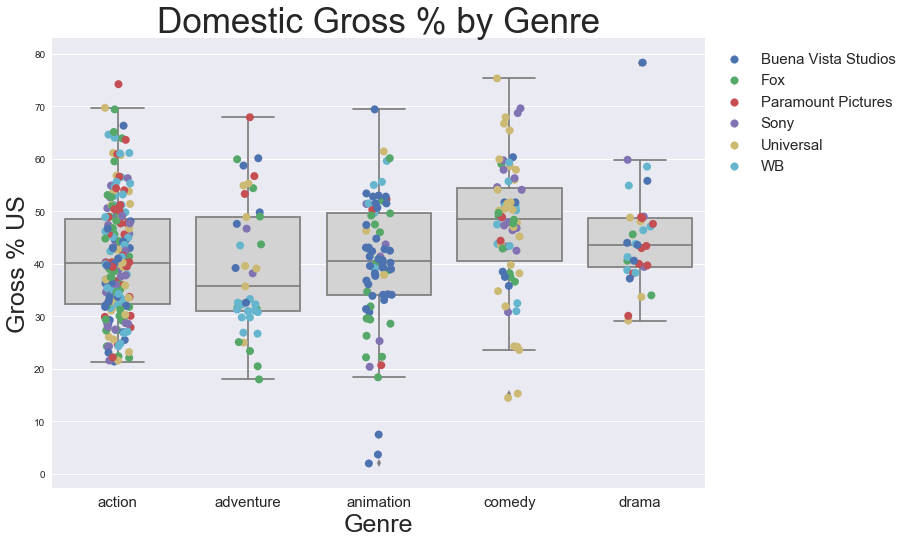

In [22]:
f,ax=plt.subplots()
f.set_size_inches(11.7,8.27)
movies2=movies[(movies.Genre=='action') | (movies.Genre=='comedy') | (movies.Genre=='adventure')
                    | (movies.Genre=='animation') | (movies.Genre=='drama')]
movies3=movies2[(movies.Studio=='Buena Vista Studios') |
                  (movies.Studio=='Sony') | (movies.Studio=='Universal') | (movies.Studio=='WB') |
                    (movies.Studio=='Paramount Pictures') | (movies.Studio=='Fox')]
movies3.Genre.cat.remove_unused_categories(inplace=True) #to remove unused Genre categories after filtering
movies3.Studio.cat.remove_unused_categories(inplace=True)
#print(movies2.Genre.cat.categories)
#print (movies2.Genre.unique())
#print (movies3.Studio.unique())
#sns.boxplot(data=movies[(movies.Genre=='action') | (movies.Genre=='comedy') | (movies.Genre=='adventure')
 #                      | (movies.Genre=='animation') | (movies.Genre=='drama') & ((movies.Studio=='Buena Vista Studios') |
  #                     (movies.Studio=='Sony') | (movies.Studio=='Universal') | (movies.Studio=='WB') |
  #                  (movies.Studio=='Paramount Pictures') | (movies.Studio=='Fox')) ],x='Genre',y='GrossPCUS',palette='gray')
sns.boxplot(data=movies3,x='Genre',y='GrossPCUS',color='lightgray')
sns.stripplot(data=movies3,x='Genre',y='GrossPCUS',hue='Studio',jitter=True,size=8,linewidth=0)
sns.set(style='darkgrid')
plt.title('Domestic Gross % by Genre',fontsize=35)
plt.ylabel('Gross % US',fontsize=25)
plt.xlabel('Genre',fontsize=25)
plt.xticks(fontsize=15)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),prop={'size':15})
plt.show()